In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

stats = pd.read_csv('us_births_69_88.csv')

# konwertowanie na numpy.ndarray
stats = stats.values

### Mateusz Nowakowski, Praca domowa 1, 2c

#### 1. Show that algorithm always ends:

Zauważmy, że suma kubełków jest stała i równa $1$.
Niech $t$ będzie liczbą kubełków wypełnionych idealnie do pełna (nie zawierających ani za dużo, ani za mało). Jeśli $t = n$ algorytm się kończy (W przeciwnym razie, jeśli $t < n$, musi istnieć kubełek zawierający za mało, skoro suma kubełków jest stała).

Zauważmy, że w każdym kroku algorytmu zwiększamy $t$ o co najmniej 1. Dzieje się tak, ponieważ za każdym razem kubełek $A$ wypełniamy do pełna zabierając z kubełka $B$, który zawiera nadwyżkę. Mamy więc dodatkowy kubełek zliczany zmienną $t$. Pozostaje jeszcze zauważyć, że skoro kubełek $B$ miał nadwyżkę, to nie należał do kubełków napełnionych idealnie do pełna, zabranie z niego zawartości by zwiększyć $A$ nie zmniejszy więc $t$ (za to może zwiększyć, jeśli zabierzemy idealnie wartość nadwyżki).

Skoro w każdym kroku algorytmu zwiększamy $t$ o 1, i $t$ jest ograniczone z góry przez $n$ - ilość kubełków, to algorytm się skończy.

#### 2. When it ends, each bucket contains pieces of at most two $p_i$'s.

Zauważmy, że prawdziwym jest fakt, że każdy kubełek zaiwerający cześć dwóch $p_i$ jest pełny i taki pozostaje do końca algorytmu. Istotnie, drugie $p_i$ kubełek może dostać wtedy i tylko gdy wypełniany jest idealnie do pełna zawartością innego kubełka.
Po wypełnieniu już nigdy nie zostanie wzięty ani jako kubełek $A$ - to znaczy kubełek zawierający za mało, ani jako kubełek $B$ - ten z nadmiarową zawartością, z którego pomocą wypełniamy kubełek $A$. Jego zawartość do końca algorytmu pozostanie więc taka sama. Nie będzie więc sytuacji, gdy do kubełka z cześciami dwóch $p_i$ dodajemy trzecią.

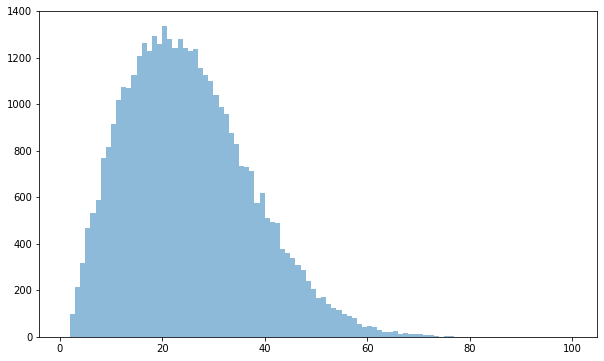

Birthday paradox cases: 40506
2C: Couple first most likely values: [20 18 21 23 16 19 22 24 26 25]
2C: Average value: 24.68742902286081
Wall time: 769 ms


In [4]:
%%time

# function that runs algorithm described in 2c and returns
def fun(p):
    n = len(p)
    V = np.mean(p) # calulcating mean of p
    original = np.array(p) # array containing info about how much of p_i is stored in i-th bucket 
    no_add = -1 # reprezents no additional p_i
    
    # array containing indexes of additional p_i
    # if additional_index[i] = j, than 'i + 1' bucket has been filled using p_{j + 1} propability
    additional_index = np.full((len(p),), no_add, dtype=int)
    
    i = 0 # 'i' represents index of bucket that is not full
    j = 0 # 'j' represents index of bucket that overflows
    
    while(i < n and original[i] >= V):
        i = i + 1
    while(j < n and original[j] <= V):
        j = j + 1
    
    while(i < n and j < n):
        diff = V - original[i]
        original[j] = original[j] - diff
        additional_index[i] = j
        i = min(i, j)
        while(i < n and (additional_index[i] != no_add or original[i] >= V)):
            i = i + 1
        while(j < n and (additional_index[j] != no_add or original[j] <= V)):
            j = j + 1
    return (original, additional_index)

n_births = stats[:, 2] # array containing number of births in each day
birth_sum = sum(n_births)
p = n_births / birth_sum # array of probailities
avg = np.mean(p) # average value of p, is equal to V in the bucket algoritm

def birthday_paradox(days):
    counter_arr = []
    s = set()
    counter = 0
    for d in days:
        counter = counter + 1
        if d in s:
            counter_arr.append(counter)
            s.clear()
            counter = 0
        else:
             s.add(d)
    return counter_arr

N = 10 ** 6
D = 372

# vectorization
random_days = np.random.randint(0, D, size = N)
random_p = np.random.uniform(0, avg, size = N)
buckets = fun(p)
days_sample = np.where(random_p <= buckets[0][random_days], random_days + 1, buckets[1][random_days] + 1)

birthday_sample = birthday_paradox(days_sample)

plt.figure(figsize=(10, 6))
plt.hist(birthday_sample, bins=range(1, 101), alpha=0.5)
plt.show()

vals, counts = np.unique(birthday_sample, return_counts=True)
k_counts = vals[np.argsort(counts)][::-1]

print("Birthday paradox cases:", len(birthday_sample))

print('2C: Couple first most likely values: {}'.format(k_counts[:10]))

print('2C: Average value: {}'.format(np.mean(birthday_sample)))

### Efficiency
Let's test the efficiency of 2c algorithm, by comparing it to algorithm described in 2a

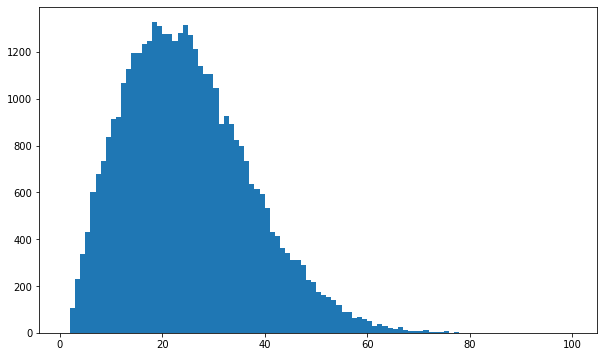

2A: Birthday paradox cases = 40506
2A: Couple first most likely values: [18 24 19 23 20 21 25 22 17 16]
2A: Average value: 24.532019947662075
Wall time: 7.11 s


372

In [6]:
%%time

# Implementation of problem 2a, from https://github.com/lukaszgrad/rpis2020

# we run 'n_birthday_samples' cases and test time

# that's how many birthday paradox cases we managed to count in 2c, 
# now we want to run exact same number
n_birthday_samples = len(birthday_sample)

# an example of a closure in Python
# Python functions are first class objects (e.g. can be returned in a function)
def create_sample(counts):
    max_count = np.max(counts)
    size = counts.shape[0]
    
    def sample():
        day = np.random.randint(0, size - 1)
        if np.random.randint(1, max_count) <= counts[day]:
            return day
        return sample()
    return sample


def emp_dates(size, sample):
    s = set()
    for k in range(size + 1):
        day = sample()
        if day in s:
            return k + 1
        else:
            s.add(day)


size = stats.shape[0]
sample = create_sample(stats[:, 2])
emp_sample = [emp_dates(size, sample) for iter in range(n_birthday_samples)]

plt.figure(figsize=(10, 6))
plt.hist(emp_sample, bins=range(1, 101))
plt.show()

vals, counts = np.unique(emp_sample, return_counts=True)
k_counts = vals[np.argsort(counts)][::-1]


print("2A: Birthday paradox cases =", n_birthday_samples)
print('2A: Couple first most likely values: {}'.format(k_counts[:10]))

print('2A: Average value: {}'.format(np.mean(emp_sample)))

It is clear that algorithm 2c is much faster than 2a